In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('totalDataset.csv')

# Data Preparation

In [2]:
#Assigning labels based on decision type column
posTypes = ['1 CHANCE SR','DP CHG.COND-PRE','DP CHG.COND-POST','DP CONTINUED','DAY PAR. GRANT.','DP DIRECTED','DP NO ACT-POST','DP NO ACTION','ETA APPROVED','FP CHG.COND-PST','FP DIRECTED','FP GRANTED','FP NO ACT-POST','FP NO ACTION','FP SUSP. CANC.','FULL PAR. w/RES','SR CHG.COND-PRE','SR CHG.COND-PST','SR SUSP. CANC.','SR NO ACT-POST','SR NO ACT.-PRE','UTA CHG.CON-PRE','UTA CHG.CON-PST','UTA NO ACT-POST','UTA NO ACT.-PRE']
negTypes = ['DAY PAR NOT DIR','DET ORD.CONFIR.','DETENT. ORDERED','DP DENIED','DP DIR REV CONF','DP GRANT CANC.','DP REV R N RECR','DP REVOKED','DP.GT.CANC.CONF','DP.REVOC.CONFIR','ETA NOT APPR.','ETA NOT AUTH','FP DENIED','FP DIR REV CONF','FP GRANT CANC.','FP NOT DIRECTED','FP REV R N RECR','FP REVOKED','FP TERMIN.CONF.','ONE CH SR REVO','SR REVOKED','STA.REL.REV.CON','UTA AUT.CAN.PRE','UTA AUTH.CAN.PT','UTA AUTHORIZED','UTA NOT AUTHOR.']

df2 = df['Decision Type'].apply(lambda i: 'Positive' if i in posTypes else 'Negative')
df['Label'] = df2
df["Label"] = df["Label"].astype('category')
df["Label"] = df["Label"].cat.codes
df = df[df['Final Decision']=='AFFIRMED']
#check for nan and missing value 
#we didn't remove nans since if we drop it only about 250 rows left.
#df.dropna(inplace=True)

#One hot coding categortial data
df2 = df.drop(columns=['Decision Type','Decision Date Fiscal Year','Decision Type Group', 'Decision Month','Review Type','Final Decision','Hearing Facility Region','Hearing Facility PB Office','Race','APR Qualifier'])
df2 = pd.get_dummies(df2)
dfpos = df2[df2['Label']==1]
dfneg = df2[df2['Label']==0]
#creating new data frame contains 500 Positive and 500 Negative records
dfpos = dfpos.sample(500)
dfneg = dfneg.sample(500)
df3 = dfpos.append(dfneg)


### Feature Selection

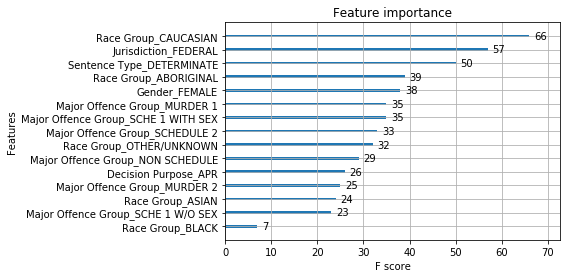

In [3]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
# split data into X and y
y=df3["Label"]#index all the rows, only the last column and valus
X=df3.loc[:, df3.columns != 'Label']
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

# AFFINITY PROPAGATION
### Affinity propagation clustering algorithm with different parameter and best feature subset from different feature selection

In [77]:

from sklearn import cluster
from sklearn import metrics

f = open("affProp.txt", "w")
checkColumns = df3.loc[:, df3.columns != 'Label']

for column in checkColumns:
    f.write('========================{0}====================\n'.format(column))
    df4 = df3['{}'.format(column)]
    i = 0.95
    for j in (-10,-15,-20,-25,-40,-50,-55,-60,-70):
        print('{0} {1} {2}'.format(column,i,j))

        affinity_propagation = cluster.AffinityPropagation(damping=i, preference=j)
        y=df3["Label"]#index all the rows, only the last column and valus
        X=pd.DataFrame(df4)#all the rows, except the last column and calues

        # Fitting with inputs
        affinity_propagation = affinity_propagation.fit(X)
        y_aff = affinity_propagation.predict(X)
        cluster_centers_indices = affinity_propagation.cluster_centers_indices_
        labels = affinity_propagation.labels_

        n_clusters_ = len(cluster_centers_indices)
        homogen = metrics.homogeneity_score(y, labels)
        complet = metrics.completeness_score(y, labels)
        vmeas = metrics.v_measure_score(y, labels)
        f.write('{0}   {1}   {2}   {3}   {4}   {5}\n'.format(n_clusters_,vmeas,homogen,complet,i,j))
        print('{0}   {1}   {2}   {3}   {4}   {5}\n'.format(n_clusters_,vmeas,homogen,complet,i,j))
f.close()

Decision Purpose_APR 0.95 -10
1   0.0   0.0   1.0   0.95   -10

Decision Purpose_APR 0.95 -15
1   0.0   0.0   1.0   0.95   -15

Decision Purpose_APR 0.95 -20
1   0.0   0.0   1.0   0.95   -20

Decision Purpose_APR 0.95 -25
1   0.0   0.0   1.0   0.95   -25

Decision Purpose_APR 0.95 -40
1   0.0   0.0   1.0   0.95   -40

Decision Purpose_APR 0.95 -50
1   0.0   0.0   1.0   0.95   -50

Decision Purpose_APR 0.95 -55
1   0.0   0.0   1.0   0.95   -55

Decision Purpose_APR 0.95 -60
1   0.0   0.0   1.0   0.95   -60

Decision Purpose_APR 0.95 -70
1   0.0   0.0   1.0   0.95   -70

Decision Purpose_BY EXCEPTION 0.95 -10
1   0.0   0.0   1.0   0.95   -10

Decision Purpose_BY EXCEPTION 0.95 -15
1   0.0   0.0   1.0   0.95   -15

Decision Purpose_BY EXCEPTION 0.95 -20
1   0.0   0.0   1.0   0.95   -20

Decision Purpose_BY EXCEPTION 0.95 -25
1   0.0   0.0   1.0   0.95   -25

Decision Purpose_BY EXCEPTION 0.95 -40
1   0.0   0.0   1.0   0.95   -40

Decision Purpose_BY EXCEPTION 0.95 -50
1   0.0   0.0   1.0 

1   0.0   0.0   1.0   0.95   -50

Race Group_CAUCASIAN 0.95 -55
2   0.0044412732492807565   0.004247789000393162   0.0046532248590906876   0.95   -55

Race Group_CAUCASIAN 0.95 -60
2   0.0044412732492807565   0.004247789000393162   0.0046532248590906876   0.95   -60

Race Group_CAUCASIAN 0.95 -70
2   0.0044412732492807565   0.004247789000393162   0.0046532248590906876   0.95   -70

Race Group_OTHER/UNKNOWN 0.95 -10
1   0.0   0.0   1.0   0.95   -10

Race Group_OTHER/UNKNOWN 0.95 -15
1   0.0   0.0   1.0   0.95   -15

Race Group_OTHER/UNKNOWN 0.95 -20
1   0.0   0.0   1.0   0.95   -20

Race Group_OTHER/UNKNOWN 0.95 -25
1   0.0   0.0   1.0   0.95   -25

Race Group_OTHER/UNKNOWN 0.95 -40
1   0.0   0.0   1.0   0.95   -40

Race Group_OTHER/UNKNOWN 0.95 -50
1   0.0   0.0   1.0   0.95   -50

Race Group_OTHER/UNKNOWN 0.95 -55
1   0.0   0.0   1.0   0.95   -55

Race Group_OTHER/UNKNOWN 0.95 -60
1   0.0   0.0   1.0   0.95   -60

Race Group_OTHER/UNKNOWN 0.95 -70
1   0.0   0.0   1.0   0.95   -70

Maj

In [106]:
from sklearn import cluster
from sklearn import metrics

f = open("affProp2.txt", "w")
chosenColumn = 'Sentence Type_INDETERMINATE'
checkColumns = df3.loc[:, df3.columns != 'Label']

for column in checkColumns:
    if column == chosenColumn:
        continue
    columns = [str(chosenColumn),str(column)]
    #columns=[str(column)]
    df4 = df3[columns]
    print(columns)
    for i in (0.8,0.90,0.95):
        for j in (-50,-55,-60,-70, -80):

            affinity_propagation = cluster.AffinityPropagation(damping=i, preference=j)
            y=df3["Label"]#index all the rows, only the last column and valus
            X=pd.DataFrame(df4)#all the rows, except the last column and calues

            # Fitting with inputs
            affinity_propagation = affinity_propagation.fit(X)
            y_aff = affinity_propagation.predict(X)
            cluster_centers_indices = affinity_propagation.cluster_centers_indices_
            labels = affinity_propagation.labels_

            n_clusters_ = len(cluster_centers_indices)
            homogen = metrics.homogeneity_score(y, labels)
            complet = metrics.completeness_score(y, labels)
            vmeas = metrics.v_measure_score(y, labels)
            if(n_clusters_>1):
                if(n_clusters_<100):
                    f.write('{0}   {1}   {2}   {3}   {4}\n'.format(n_clusters_,vmeas,i,j, columns))
                    print('{0}   {1}   {2}   {3}   {4}'.format(n_clusters_,vmeas,i,j, columns))
                    clusterdict = {}
                    for k, v in zip(labels,y):
                        if not '{0}-{1}'.format(k,v) in clusterdict:
                            clusterdict['{0}-{1}'.format(k,v)] = 1
                        else:
                            clusterdict['{0}-{1}'.format(k,v)] +=1
                    print(clusterdict)
                    print('\n')
                    f.write('\t'+str(clusterdict))
                    f.write('\n')
f.close()

['Sentence Type_INDETERMINATE', 'Decision Purpose_APR']
2   0.0001417968505665175   0.9   -50   ['Sentence Type_INDETERMINATE', 'Decision Purpose_APR']
{'0-1': 258, '1-1': 242, '0-0': 265, '1-0': 235}


2   2.904737841860018e-06   0.9   -70   ['Sentence Type_INDETERMINATE', 'Decision Purpose_APR']
{'0-1': 268, '1-1': 232, '1-0': 233, '0-0': 267}


2   0.07218050712527962   0.95   -50   ['Sentence Type_INDETERMINATE', 'Decision Purpose_APR']
{'0-1': 480, '1-1': 20, '0-0': 390, '1-0': 110}


2   0.07218050712527962   0.95   -55   ['Sentence Type_INDETERMINATE', 'Decision Purpose_APR']
{'0-1': 480, '1-1': 20, '0-0': 390, '1-0': 110}


2   0.07218050712527962   0.95   -70   ['Sentence Type_INDETERMINATE', 'Decision Purpose_APR']
{'0-1': 480, '1-1': 20, '0-0': 390, '1-0': 110}


2   0.07218050712527962   0.95   -80   ['Sentence Type_INDETERMINATE', 'Decision Purpose_APR']
{'0-1': 480, '1-1': 20, '0-0': 390, '1-0': 110}


['Sentence Type_INDETERMINATE', 'Decision Purpose_BY EXCEPTION']
2   0

2   1.1550642835735018e-05   0.9   -50   ['Sentence Type_INDETERMINATE', 'Race Group_BLACK']
{'0-1': 243, '1-1': 257, '0-0': 245, '1-0': 255}


2   1.1550642835735018e-05   0.9   -55   ['Sentence Type_INDETERMINATE', 'Race Group_BLACK']
{'0-1': 243, '1-1': 257, '0-0': 245, '1-0': 255}


2   0.0002344039299487995   0.9   -60   ['Sentence Type_INDETERMINATE', 'Race Group_BLACK']
{'0-1': 243, '1-1': 257, '1-0': 266, '0-0': 234}


2   7.246743375953228e-05   0.9   -70   ['Sentence Type_INDETERMINATE', 'Race Group_BLACK']
{'0-1': 262, '1-1': 238, '0-0': 267, '1-0': 233}


2   0.00041918256878612593   0.9   -80   ['Sentence Type_INDETERMINATE', 'Race Group_BLACK']
{'0-1': 276, '1-1': 224, '1-0': 236, '0-0': 264}


2   0.07218050712527962   0.95   -55   ['Sentence Type_INDETERMINATE', 'Race Group_BLACK']
{'0-1': 480, '1-1': 20, '0-0': 390, '1-0': 110}


['Sentence Type_INDETERMINATE', 'Race Group_CAUCASIAN']
89   0.02122573924295499   0.8   -70   ['Sentence Type_INDETERMINATE', 'Race Group_CA

KeyboardInterrupt: 

# K MEANS
### K means clustering algorithm with different parameter and best feature subset from different feature selection

In [129]:
from sklearn.cluster import KMeans

f2 = open("kmeans4.txt", "w")
chosenColumn = 'Sentence Type_INDETERMINATE'
chosenColumn2 = 'Jurisdiction_FEDERAL'
chosenColumn3 = 'Decision Purpose_BY EXCEPTION'
#checkColumns = df3.loc[:, df3.columns != 'Label']
y=df3["Label"]#index all the rows, only the last column and valus
labels_true=y

for column in checkColumns:
    if column == chosenColumn:
        continue
    if column == chosenColumn2:
        continue
    if column == chosenColumn3:
        continue
    if column == chosenColumn4:
        continue
    columns = [str(chosenColumn),str(chosenColumn2),str(chosenColumn3),str(column)]
    #columns = [str(column)]
    f2.write('==============={0}=============\n'.format(columns))
    print(columns)
    df4 = df3[columns]
    for i in (2,3,4,5,6,7,8,9):
        k = i
        X = pd.DataFrame(df4)
            
        kmeans = KMeans(n_clusters=i)
        kmeans = kmeans.fit(X)
        #core_samples_mask = np.zeros_like(kmeans.labels_, dtype=bool)
        #core_samples_mask[kmeans.core_sample_indices_] = True
        labels = kmeans.labels_

        # Number of clusters in labels, ignoring noise if present.
        #homogen = metrics.homogeneity_score(labels_true, labels)
        #completeness = metrics.completeness_score(labels_true, labels)
        vmeasure = metrics.v_measure_score(labels_true, labels)
        outliers = X[labels == -1]
        
        f2.write('{0}   {1}   {2}\n'.format(n_clusters_,vmeasure,i))
        print('{0}   {1}   {2}'.format(n_clusters_,vmeasure,i))
        clusterdict = {}
        for k, v in zip(labels,y):
            if not '{0}-{1}'.format(k,v) in clusterdict:
                clusterdict['{0}-{1}'.format(k,v)] = 1
            else:
                clusterdict['{0}-{1}'.format(k,v)] +=1
        f2.write(str(clusterdict)+'\n')
        print(clusterdict)
        print('\n')
f2.close()

['Sentence Type_INDETERMINATE', 'Jurisdiction_FEDERAL', 'Decision Purpose_BY EXCEPTION', 'Decision Purpose_APR']
1   0.054133460599056375   2
{'0-1': 477, '1-1': 23, '1-0': 99, '0-0': 401}


1   0.045638533330840426   3
{'0-1': 446, '1-1': 31, '2-1': 23, '2-0': 99, '0-0': 378, '1-0': 23}


1   0.07970579561082994   4
{'0-1': 444, '3-1': 31, '2-1': 23, '1-1': 2, '2-0': 99, '0-0': 334, '3-0': 23, '1-0': 44}


1   0.07970579561082994   5
{'4-1': 444, '2-1': 31, '1-1': 23, '3-1': 2, '1-0': 99, '4-0': 334, '2-0': 23, '3-0': 44}


1   0.07970579561082994   6
{'0-1': 444, '2-1': 31, '1-1': 23, '3-1': 2, '1-0': 99, '0-0': 334, '2-0': 23, '3-0': 44}


1   0.07970579561082994   7
{'0-1': 444, '2-1': 31, '1-1': 23, '3-1': 2, '1-0': 99, '0-0': 334, '2-0': 23, '3-0': 44}


1   0.07970579561082994   8
{'0-1': 444, '2-1': 31, '1-1': 23, '3-1': 2, '1-0': 99, '0-0': 334, '2-0': 23, '3-0': 44}


1   0.07970579561082994   9
{'0-1': 444, '2-1': 31, '1-1': 23, '3-1': 2, '1-0': 99, '0-0': 334, '2-0': 23, '3

1   0.0006287026160286129   2
{'0-1': 360, '1-1': 140, '0-0': 347, '1-0': 153}


1   0.03633695007827946   3
{'0-1': 341, '2-1': 136, '1-1': 23, '1-0': 99, '0-0': 279, '2-0': 122}


1   0.035890322411860444   4
{'0-1': 341, '1-1': 136, '3-1': 4, '2-1': 19, '2-0': 68, '0-0': 279, '1-0': 122, '3-0': 31}


1   0.0560591755113426   5
{'0-1': 340, '1-1': 136, '3-1': 4, '2-1': 19, '4-1': 1, '2-0': 68, '0-0': 250, '1-0': 122, '4-0': 29, '3-0': 31}


1   0.06353582378985007   6
{'1-1': 340, '2-1': 135, '4-1': 4, '0-1': 19, '5-1': 1, '3-1': 1, '0-0': 68, '1-0': 250, '2-0': 107, '3-0': 29, '5-0': 15, '4-0': 31}


1   0.06353582378985007   7
{'6-1': 340, '0-1': 135, '3-1': 4, '2-1': 19, '5-1': 1, '4-1': 1, '2-0': 68, '6-0': 250, '0-0': 107, '4-0': 29, '5-0': 15, '3-0': 31}


1   0.06353582378985007   8
{'0-1': 340, '1-1': 135, '3-1': 4, '2-1': 19, '5-1': 1, '4-1': 1, '2-0': 68, '0-0': 250, '1-0': 107, '4-0': 29, '5-0': 15, '3-0': 31}


1   0.06353582378985007   9
{'0-1': 340, '7-1': 135, '3-1': 4

1   0.06996597042774412   9
{'0-1': 391, '1-1': 84, '2-1': 23, '3-1': 2, '2-0': 99, '0-0': 291, '3-0': 38, '1-0': 66, '4-0': 6}




# DBSCAN
### DBSCAN clustering algorithm with different parameter and all features from different feature selection

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics


f2 = open("DBSCAN.txt", "w")
checkColumns = df3.loc[:, df3.columns != 'Label']
y=df3["Label"]#index all the rows, only the last column and valus
labels_true=y

for column in checkColumns:
    f2.write('========================{0}====================\n'.format(column))
    df4 = df3['{}'.format(column)]
    for i in (0.2,0.4,0.5,0.8,1,1.5,2,2.5,3):
        for j in (1,2,3,4,5):
            eps = i
            min_samples = j
            print('{0} {1} {2}'.format(column,i,j))

            #X = StandardScaler().fit_transform(df4)
            X = pd.DataFrame(df4)
            
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            homogen = metrics.homogeneity_score(labels_true, labels)
            completeness = metrics.completeness_score(labels_true, labels)
            vmeasure = metrics.v_measure_score(labels_true, labels)
            
            if(n_clusters_ == 2):
                f2.write('{0}   {1}   {2}   {3}   {4}   {5}\n'.format(n_clusters_,vmeasure,homogen,completeness,i,j))
f2.close()

## DBSCAN 
### DBSCAN clustering algorithm with different parameter and best feature subset from different feature selection

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

f2 = open("DBSCAN3.txt", "w")
chosenColumn = 'Sentence Type_DETERMINATE'
chosenColumn2 = 'Jurisdiction_FEDERAL'
chosenColumn3 = 'Decision Purpose_BY EXCEPTION'
checkColumns = df3.loc[:, df3.columns != 'Label']
y=df3["Label"]#index all the rows, only the last column and valus
labels_true=y

for column in checkColumns:
    if column == chosenColumn:
        continue
    if column == chosenColumn2:
        continue
    if column == chosenColumn3:
        continue
    columns = [str(chosenColumn),str(chosenColumn2),str(chosenColumn3),str(column)]
    f2.write('==============={0}=============\n'.format(columns))
    print(columns)
    df4 = df3[columns]
    for i in (0.1,0.2,0.3,0.4,0.5,0.75,1,1.5,2,2.5,3,5,10):
        for j in (1,2,3,4,5,7,10):
            eps = i
            min_samples = j
            #print('{0} {1} {2}'.format(columns,i,j))

            #X = StandardScaler().fit_transform(df4)
            X = pd.DataFrame(df4)
            
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Number of clusters in labels, ignoring noise if present.
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            homogen = metrics.homogeneity_score(labels_true, labels)
            completeness = metrics.completeness_score(labels_true, labels)
            vmeasure = metrics.v_measure_score(labels_true, labels)
            outliers = X[labels == -1]
            
            if(n_clusters_ > 1):
                if(n_clusters_ < 20):
                    f2.write('{0}   {1}   {2}   {3}\n'.format(n_clusters_,vmeasure,i,j))
                    print('{0}   {1}   {2}   {3}'.format(n_clusters_,vmeasure,i,j))
                    clusterdict = {}
                    for k, v in zip(labels,y):
                        if not '{0}-{1}'.format(k,v) in clusterdict:
                            clusterdict['{0}-{1}'.format(k,v)] = 1
                        else:
                            clusterdict['{0}-{1}'.format(k,v)] +=1
                    f2.write(str(clusterdict)+'\n')
                    print(clusterdict)
                    print('\n')
f2.close()

['Sentence Type_DETERMINATE', 'Jurisdiction_FEDERAL', 'Decision Purpose_BY EXCEPTION', 'Decision Purpose_APR']
5   0.09824687756418975   0.1   1
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '4-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.1   2
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.1   3
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.1   4
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.1   5
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.1   7
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.1   10
{'0-1': 449, '1-1': 20, '2-

4   0.09824687756418975   0.3   3
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.3   4
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.3   5
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.3   7
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.3   10
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


5   0.09824687756418975   0.4   1
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '4-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.4   2
{'0-1': 449, '1-1': 20, '2-1': 29, '3-1': 1, '-1-1': 1, '0-0': 334, '1-0': 110, '3-0': 41, '2-0': 15}


4   0.09824687756418975   0.4   3


3   0.11067807333616346   0.75   7
{'0-1': 478, '1-1': 20, '2-1': 1, '-1-1': 1, '0-0': 349, '1-0': 110, '2-0': 41}


3   0.11067807333616346   0.75   10
{'0-1': 478, '1-1': 20, '2-1': 1, '-1-1': 1, '0-0': 349, '1-0': 110, '2-0': 41}


2   0.058155268070906756   1   1
{'0-1': 499, '1-1': 1, '0-0': 459, '1-0': 41}


2   0.058155268070906756   1   2
{'0-1': 499, '1-1': 1, '0-0': 459, '1-0': 41}


2   0.058155268070906756   1   3
{'0-1': 499, '1-1': 1, '0-0': 459, '1-0': 41}


2   0.058155268070906756   1   4
{'0-1': 499, '1-1': 1, '0-0': 459, '1-0': 41}


2   0.058155268070906756   1   5
{'0-1': 499, '1-1': 1, '0-0': 459, '1-0': 41}


2   0.058155268070906756   1   7
{'0-1': 499, '1-1': 1, '0-0': 459, '1-0': 41}


2   0.058155268070906756   1   10
{'0-1': 499, '1-1': 1, '0-0': 459, '1-0': 41}


['Sentence Type_DETERMINATE', 'Jurisdiction_FEDERAL', 'Decision Purpose_BY EXCEPTION', 'Sentence Type_INDETERMINATE']
4   0.11067807333616347   0.1   1
{'0-1': 478, '1-1': 20, '2-1': 1, '3-1': 1, '

{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '4-0': 6, '-1-0': 2}


5   0.09838100489397582   0.3   4
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '4-0': 6, '-1-0': 2}


5   0.09838100489397582   0.3   5
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '4-0': 6, '-1-0': 2}


4   0.09702570815990065   0.3   7
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '-1-0': 8}


4   0.09702570815990065   0.3   10
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '-1-0': 8}


7   0.1009621638705944   0.4   1
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '4-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '5-0': 6, '6-0': 2}


6   0.1009621638705944   0.4   2
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 

7   0.1009621638705944   0.75   1
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '4-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '5-0': 6, '6-0': 2}


6   0.1009621638705944   0.75   2
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '4-0': 6, '5-0': 2}


5   0.09838100489397582   0.75   3
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '4-0': 6, '-1-0': 2}


5   0.09838100489397582   0.75   4
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '4-0': 6, '-1-0': 2}


5   0.09838100489397582   0.75   5
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '4-0': 6, '-1-0': 2}


4   0.09702570815990065   0.75   7
{'0-1': 460, '1-1': 20, '2-1': 18, '3-1': 1, '-1-1': 1, '0-0': 340, '1-0': 104, '2-0': 9, '3-0': 39, '-1-0': 8}


4   0.09702570815990065   0.75   10
{'0-1': 460, '1-1': 20, '

['Sentence Type_DETERMINATE', 'Jurisdiction_FEDERAL', 'Decision Purpose_BY EXCEPTION', 'Race Group_ASIAN']
7   0.102276369316259   0.1   1
{'0-1': 463, '1-1': 15, '2-1': 20, '3-1': 1, '4-1': 1, '0-0': 324, '2-0': 107, '3-0': 39, '1-0': 25, '5-0': 3, '6-0': 2}


6   0.102276369316259   0.1   2
{'0-1': 463, '1-1': 15, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 324, '2-0': 107, '3-0': 39, '1-0': 25, '4-0': 3, '5-0': 2}


5   0.09975300638681364   0.1   3
{'0-1': 463, '1-1': 15, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 324, '2-0': 107, '3-0': 39, '1-0': 25, '4-0': 3, '-1-0': 2}


4   0.09893398241016874   0.1   4
{'0-1': 463, '1-1': 15, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 324, '2-0': 107, '3-0': 39, '1-0': 25, '-1-0': 5}


4   0.09893398241016874   0.1   5
{'0-1': 463, '1-1': 15, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 324, '2-0': 107, '3-0': 39, '1-0': 25, '-1-0': 5}


4   0.09893398241016874   0.1   7
{'0-1': 463, '1-1': 15, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 324, '2-0': 107, '3-0': 39, 

5   0.08960854371741286   0.3   4
{'0-1': 432, '1-1': 46, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 304, '2-0': 102, '1-0': 45, '3-0': 40, '4-0': 8, '-1-0': 1}


5   0.08960854371741286   0.3   5
{'0-1': 432, '1-1': 46, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 304, '2-0': 102, '1-0': 45, '3-0': 40, '4-0': 8, '-1-0': 1}


5   0.08960854371741286   0.3   7
{'0-1': 432, '1-1': 46, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 304, '2-0': 102, '1-0': 45, '3-0': 40, '4-0': 8, '-1-0': 1}


4   0.08751965978677076   0.3   10
{'0-1': 432, '1-1': 46, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 304, '2-0': 102, '1-0': 45, '3-0': 40, '-1-0': 9}


7   0.09128799117511804   0.4   1
{'0-1': 432, '1-1': 46, '2-1': 20, '3-1': 1, '4-1': 1, '0-0': 304, '2-0': 102, '1-0': 45, '3-0': 40, '5-0': 8, '6-0': 1}


5   0.08960854371741286   0.4   2
{'0-1': 432, '1-1': 46, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 304, '2-0': 102, '1-0': 45, '3-0': 40, '4-0': 8, '-1-0': 1}


5   0.08960854371741286   0.4   3
{'0-1': 432, '1-1': 46,

6   0.08014844569645886   0.5   2
{'0-1': 331, '1-1': 147, '2-1': 4, '3-1': 16, '4-1': 1, '-1-1': 1, '0-0': 205, '3-0': 72, '1-0': 144, '5-0': 26, '2-0': 38, '4-0': 15}


6   0.08014844569645886   0.5   3
{'0-1': 331, '1-1': 147, '2-1': 4, '3-1': 16, '4-1': 1, '-1-1': 1, '0-0': 205, '3-0': 72, '1-0': 144, '5-0': 26, '2-0': 38, '4-0': 15}


6   0.08014844569645886   0.5   4
{'0-1': 331, '1-1': 147, '2-1': 4, '3-1': 16, '4-1': 1, '-1-1': 1, '0-0': 205, '3-0': 72, '1-0': 144, '5-0': 26, '2-0': 38, '4-0': 15}


6   0.08014844569645886   0.5   5
{'0-1': 331, '1-1': 147, '2-1': 4, '3-1': 16, '4-1': 1, '-1-1': 1, '0-0': 205, '3-0': 72, '1-0': 144, '5-0': 26, '2-0': 38, '4-0': 15}


6   0.08014844569645886   0.5   7
{'0-1': 331, '1-1': 147, '2-1': 4, '3-1': 16, '4-1': 1, '-1-1': 1, '0-0': 205, '3-0': 72, '1-0': 144, '5-0': 26, '2-0': 38, '4-0': 15}


6   0.08014844569645886   0.5   10
{'0-1': 331, '1-1': 147, '2-1': 4, '3-1': 16, '4-1': 1, '-1-1': 1, '0-0': 205, '3-0': 72, '1-0': 144, '5-0': 2

['Sentence Type_DETERMINATE', 'Jurisdiction_FEDERAL', 'Decision Purpose_BY EXCEPTION', 'Major Offence Group_MURDER 1']
6   0.10596308235897936   0.1   1
{'0-1': 477, '1-1': 17, '2-1': 3, '3-1': 1, '4-1': 1, '5-1': 1, '0-0': 349, '1-0': 91, '3-0': 41, '2-0': 19}


4   0.10607428688410636   0.1   2
{'0-1': 477, '1-1': 17, '2-1': 3, '3-1': 1, '-1-1': 2, '0-0': 349, '1-0': 91, '3-0': 41, '2-0': 19}


4   0.10607428688410636   0.1   3
{'0-1': 477, '1-1': 17, '2-1': 3, '3-1': 1, '-1-1': 2, '0-0': 349, '1-0': 91, '3-0': 41, '2-0': 19}


4   0.10607428688410636   0.1   4
{'0-1': 477, '1-1': 17, '2-1': 3, '3-1': 1, '-1-1': 2, '0-0': 349, '1-0': 91, '3-0': 41, '2-0': 19}


4   0.10607428688410636   0.1   5
{'0-1': 477, '1-1': 17, '2-1': 3, '3-1': 1, '-1-1': 2, '0-0': 349, '1-0': 91, '3-0': 41, '2-0': 19}


4   0.10607428688410636   0.1   7
{'0-1': 477, '1-1': 17, '2-1': 3, '3-1': 1, '-1-1': 2, '0-0': 349, '1-0': 91, '3-0': 41, '2-0': 19}


4   0.10607428688410636   0.1   10
{'0-1': 477, '1-1': 1

4   0.10507411350188   0.3   7
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1': 1, '-1-1': 1, '0-0': 349, '2-0': 46, '1-0': 64, '3-0': 41}


4   0.10507411350188   0.3   10
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1': 1, '-1-1': 1, '0-0': 349, '2-0': 46, '1-0': 64, '3-0': 41}


5   0.10507411350188   0.4   1
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1': 1, '4-1': 1, '0-0': 349, '2-0': 46, '1-0': 64, '3-0': 41}


4   0.10507411350188   0.4   2
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1': 1, '-1-1': 1, '0-0': 349, '2-0': 46, '1-0': 64, '3-0': 41}


4   0.10507411350188   0.4   3
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1': 1, '-1-1': 1, '0-0': 349, '2-0': 46, '1-0': 64, '3-0': 41}


4   0.10507411350188   0.4   4
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1': 1, '-1-1': 1, '0-0': 349, '2-0': 46, '1-0': 64, '3-0': 41}


4   0.10507411350188   0.4   5
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1': 1, '-1-1': 1, '0-0': 349, '2-0': 46, '1-0': 64, '3-0': 41}


4   0.10507411350188   0.4   7
{'0-1': 478, '1-1': 15, '2-1': 5, '3-1

5   0.08146538462065107   0.75   5
{'0-1': 377, '1-1': 101, '2-1': 19, '-1-1': 2, '3-1': 1, '0-0': 269, '2-0': 109, '1-0': 80, '4-0': 17, '-1-0': 1, '3-0': 24}


5   0.08146538462065107   0.75   7
{'0-1': 377, '1-1': 101, '2-1': 19, '-1-1': 2, '3-1': 1, '0-0': 269, '2-0': 109, '1-0': 80, '4-0': 17, '-1-0': 1, '3-0': 24}


5   0.08146538462065107   0.75   10
{'0-1': 377, '1-1': 101, '2-1': 19, '-1-1': 2, '3-1': 1, '0-0': 269, '2-0': 109, '1-0': 80, '4-0': 17, '-1-0': 1, '3-0': 24}


['Sentence Type_DETERMINATE', 'Jurisdiction_FEDERAL', 'Decision Purpose_BY EXCEPTION', 'Major Offence Group_SCHE 1 W/O SEX']
7   0.07715466520596471   0.1   1
{'0-1': 229, '1-1': 249, '2-1': 19, '3-1': 1, '4-1': 1, '5-1': 1, '1-0': 206, '2-0': 99, '0-0': 143, '6-0': 29, '5-0': 11, '3-0': 12}


6   0.07715466520596471   0.1   2
{'0-1': 229, '1-1': 249, '2-1': 19, '3-1': 1, '-1-1': 1, '4-1': 1, '1-0': 206, '2-0': 99, '0-0': 143, '5-0': 29, '4-0': 11, '3-0': 12}


6   0.07715466520596471   0.1   3
{'0-1': 229, 

6   0.09010256463019253   0.2   3
{'0-1': 420, '1-1': 58, '2-1': 20, '3-1': 1, '-1-1': 1, '1-0': 62, '4-0': 15, '0-0': 287, '2-0': 95, '3-0': 35, '5-0': 6}


6   0.09010256463019253   0.2   4
{'0-1': 420, '1-1': 58, '2-1': 20, '3-1': 1, '-1-1': 1, '1-0': 62, '4-0': 15, '0-0': 287, '2-0': 95, '3-0': 35, '5-0': 6}


6   0.09010256463019253   0.2   5
{'0-1': 420, '1-1': 58, '2-1': 20, '3-1': 1, '-1-1': 1, '1-0': 62, '4-0': 15, '0-0': 287, '2-0': 95, '3-0': 35, '5-0': 6}


5   0.08679726405852946   0.2   7
{'0-1': 420, '1-1': 58, '2-1': 20, '3-1': 1, '-1-1': 1, '1-0': 62, '4-0': 15, '0-0': 287, '2-0': 95, '3-0': 35, '-1-0': 6}


5   0.08679726405852946   0.2   10
{'0-1': 420, '1-1': 58, '2-1': 20, '3-1': 1, '-1-1': 1, '1-0': 62, '4-0': 15, '0-0': 287, '2-0': 95, '3-0': 35, '-1-0': 6}


7   0.09010256463019255   0.3   1
{'0-1': 420, '1-1': 58, '2-1': 20, '3-1': 1, '4-1': 1, '1-0': 62, '5-0': 15, '0-0': 287, '2-0': 95, '3-0': 35, '6-0': 6}


6   0.09010256463019253   0.3   2
{'0-1': 420, '1-

6   0.08346221868424825   0.5   1
{'0-1': 389, '1-1': 89, '2-1': 20, '3-1': 1, '4-1': 1, '0-0': 285, '2-0': 110, '3-0': 35, '1-0': 64, '5-0': 6}


5   0.08346221868424825   0.5   2
{'0-1': 389, '1-1': 89, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 285, '2-0': 110, '3-0': 35, '1-0': 64, '4-0': 6}


5   0.08346221868424825   0.5   3
{'0-1': 389, '1-1': 89, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 285, '2-0': 110, '3-0': 35, '1-0': 64, '4-0': 6}


5   0.08346221868424825   0.5   4
{'0-1': 389, '1-1': 89, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 285, '2-0': 110, '3-0': 35, '1-0': 64, '4-0': 6}


5   0.08346221868424825   0.5   5
{'0-1': 389, '1-1': 89, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 285, '2-0': 110, '3-0': 35, '1-0': 64, '4-0': 6}


4   0.0801595263669767   0.5   7
{'0-1': 389, '1-1': 89, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 285, '2-0': 110, '3-0': 35, '1-0': 64, '-1-0': 6}


4   0.0801595263669767   0.5   10
{'0-1': 389, '1-1': 89, '2-1': 20, '3-1': 1, '-1-1': 1, '0-0': 285, '2-0': 110,

# Result
### Plot result

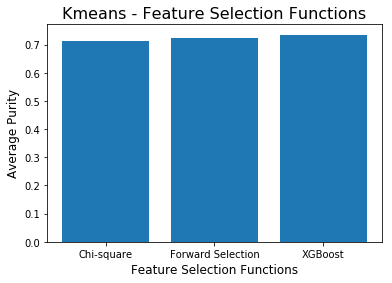

In [53]:
import matplotlib.pyplot as plt
import numpy as np
 
function=['Chi-square','Forward Selection','XGBoost']
pos = np.arange(len(function))
kmeans = [0.712,0.723,0.735]
 
plt.bar(pos,kmeans)
plt.xticks(pos, function)
plt.xlabel('Feature Selection Functions', fontsize=12)
plt.ylabel('Average Purity', fontsize=12)
plt.title('Kmeans - Feature Selection Functions', fontsize=16)
plt.show()


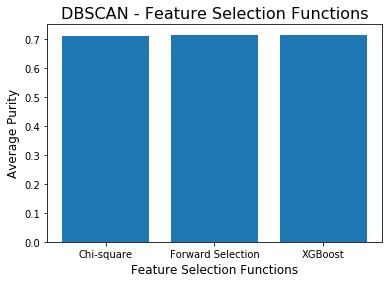

In [54]:
import matplotlib.pyplot as plt
import numpy as np
 
function=['Chi-square','Forward Selection','XGBoost']
pos = np.arange(len(function))
dbs = [0.712,0.716,0.715]
 
plt.bar(pos,dbs)
plt.xticks(pos, function)
plt.xlabel('Feature Selection Functions', fontsize=12)
plt.ylabel('Average Purity', fontsize=12)
plt.title('DBSCAN - Feature Selection Functions',fontsize=16)
plt.show()

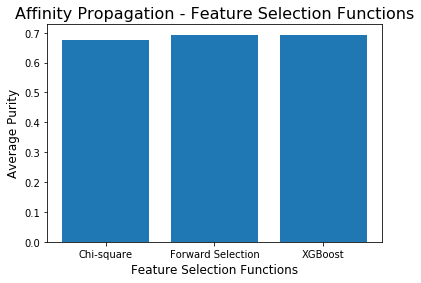

In [55]:
import matplotlib.pyplot as plt
import numpy as np
 
function=['Chi-square','Forward Selection','XGBoost']
pos = np.arange(len(function))
ap = [0.677,0.692,0.6935]
 
x = plt.bar(pos,ap)
plt.xticks(pos, function)
# Add counts above the two bar graphs
#for rect in x:
#    height = rect.get_height()
#    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.xlabel('Feature Selection Functions', fontsize=12)
plt.ylabel('Average Purity', fontsize=12)
plt.title('Affinity Propagation - Feature Selection Functions',fontsize=16)
plt.show()

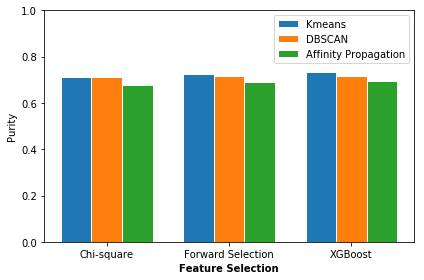

In [61]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0.712,0.723,0.735]
bars2 = [0.712,0.716,0.715]
bars3 = [0.677,0.692,0.6935]
#bars1 = [0.712,0.712,0.677]
#bars2 = [0.723,0.716,0.692]
#bars3 = [0.735,0.715,0.6935]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Kmeans')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='DBSCAN')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='Affinity Propagation')
 
# Add xticks on the middle of the group bars
plt.xlabel('Feature Selection', fontweight='bold')
plt.ylim((0, 1))
plt.ylabel('Purity')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Chi-square','Forward Selection','XGBoost'])
 
# Create legend & Show graphic
#plt.title('Clustering Algorithm - Feature Selection Functions',fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()
